In [1]:
from sklearn.datasets import load_wine
wine=load_wine()

In [2]:
dir(wine)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [3]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split

In [5]:
print('Wine data shape', wine.data.shape)
print('Wine target shape', wine.target.shape)

Wine data shape (178, 13)
Wine target shape (178,)


In [6]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [14]:
# df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
#                   columns= np.append(cancer['feature_names'], ['target']))
import numpy as np
df=pd.DataFrame(np.c_[wine['data'],wine['target']],
               columns=np.append(wine['feature_names'],['target']))
df.head(20)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0.0


In [13]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [15]:
df.tail(20)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.000000,0.57,1.96,660.0,2.0
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.750000,0.57,1.78,620.0,2.0
160,12.36,3.83,2.38,21.0,88.0,2.30,0.92,0.50,1.04,7.650000,0.56,1.58,520.0,2.0
161,13.69,3.26,2.54,20.0,107.0,1.83,0.56,0.50,0.80,5.880000,0.96,1.82,680.0,2.0
162,12.85,3.27,2.58,22.0,106.0,1.65,0.60,0.60,0.96,5.580000,0.87,2.11,570.0,2.0
163,12.96,3.45,2.35,18.5,106.0,1.39,0.70,0.40,0.94,5.280000,0.68,1.75,675.0,2.0
164,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.580000,0.70,1.68,615.0,2.0
165,13.73,4.36,2.26,22.5,88.0,1.28,0.47,0.52,1.15,6.620000,0.78,1.75,520.0,2.0
166,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.680000,0.85,1.56,695.0,2.0
167,12.82,3.37,2.30,19.5,88.0,1.48,0.66,0.40,0.97,10.260000,0.72,1.75,685.0,2.0


In [17]:
df['target']=df['target'].astype(int)

In [18]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [22]:
df.groupby('target').size()

target
0    59
1    71
2    48
dtype: int64

In [23]:
target=df.target
target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [25]:
df.drop('target',axis='columns', inplace=True)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [35]:
X_train,X_test, y_train,y_test=train_test_split(df,target,test_size=0.2, random_state=100)

In [27]:
model_gb=GaussianNB()
model_mn=MultinomialNB()

In [36]:
model_gb=GaussianNB()
model_gb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:

model_mn.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
model_gb.score(X_test,y_test)

1.0

In [30]:
model_mn.score(X_test,y_test)

0.8333333333333334

In [38]:
pred=model_gb.predict(X_test)
accuracy_score(pred, y_test)

1.0

In [39]:
y_test[:10]

88     1
159    2
11     0
74     1
158    2
149    2
99     1
96     1
90     1
95     1
Name: target, dtype: int32

In [40]:
model_gb.predict(X_test[:10])

array([1, 2, 0, 1, 2, 2, 1, 1, 1, 1])

In [41]:
model_mn.predict(X_test[:10])

array([2, 2, 0, 0, 2, 2, 1, 1, 1, 1])

In [52]:
predi=model_mn.predict(X_test)
score=accuracy_score(pred,y_test)

In [46]:
cn=confusion_matrix(y_test,predi)

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1, 'Accuracy score: 1.0')

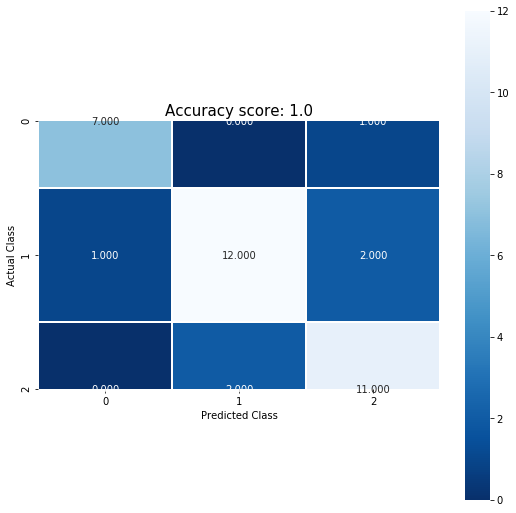

In [53]:
plt.figure(figsize=(9,9))
sns.heatmap(cn, annot=True,fmt=".3f", linewidth=.5, square=True, cmap='Blues_r' );
plt.ylabel('Actual Class');
plt.xlabel('Predicted Class');
all_sample_title='Accuracy score: {0}'.format(score)
plt.title(all_sample_title, size=15)